<a href="https://colab.research.google.com/github/mariiacamila31/NVDA---LSTM_Recurrent_Neural_Network/blob/main/NVDA_LSTM_Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Recurrent Neural Network For Algorithmic Trading**

1. Load and clean all of the historical data from NVDA
2. Create plot to visualize the stock's movement since it was first traded

In [30]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

##1. Load and clean all historical data from NVIDIA Corporation

In [31]:
# Load the all of the historical dataset
NVDA = pd.read_csv('NVDA.csv')
NVDA

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376288,271468800
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415709,51048000
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383456,34320000
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382261,24436800
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381067,22752000
...,...,...,...,...,...,...,...
6243,2023-11-13,483.200012,491.160004,480.989990,486.200012,486.200012,38413600
6244,2023-11-14,496.799988,498.339996,490.399994,496.559998,496.559998,41695400
6245,2023-11-15,499.350006,499.600006,482.000000,488.880005,488.880005,47549700
6246,2023-11-16,486.790009,495.250000,483.299988,494.799988,494.799988,33975600


The gaps in the data set reflects holidays and weekends.

In [32]:
# Select only the columns that will be used for this project. We will use the adjusted closing price to reflect any corporate actions.
NVDA = NVDA[['Date', 'Adj Close']]

# Show the new dataframe
NVDA

,Date,Adj Close
0,1999-01-22,0.376288
1,1999-01-25,0.415709
2,1999-01-26,0.383456
3,1999-01-27,0.382261
4,1999-01-28,0.381067
...,...,...
6243,2023-11-13,486.200012
6244,2023-11-14,496.559998
6245,2023-11-15,488.880005
6246,2023-11-16,494.799988


In [33]:
# Check the data types
NVDA.dtypes

Date          object
Adj Close    float64
dtype: object

In [34]:
# Change the data type for the date
import datetime

# Since the dates are in a string format, we will create a function to split the date using the (-) or separators
def str_to_datetime(s):
  split = s.split('-')
  year, month, day =  int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

# Testing the function
datetime_object = str_to_datetime('2023-11-17')
datetime_object

datetime.datetime(2023, 11, 17, 0, 0)

In [35]:
# Now use the function created above to the entire date column in our dataframe
NVDA['Date'] = NVDA['Date'].apply(str_to_datetime)
NVDA

<ipython-input-35-cd814a22ed25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA['Date'] = NVDA['Date'].apply(str_to_datetime)


,Date,Adj Close
0,1999-01-22,0.376288
1,1999-01-25,0.415709
2,1999-01-26,0.383456
3,1999-01-27,0.382261
4,1999-01-28,0.381067
...,...,...
6243,2023-11-13,486.200012
6244,2023-11-14,496.559998
6245,2023-11-15,488.880005
6246,2023-11-16,494.799988


In [36]:
# Check for the change
NVDA.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [37]:
# Round the adjusted closing price 2 decimal places
NVDA['Adj Close'] = NVDA['Adj Close'].round(2)
NVDA

<ipython-input-37-9f73f8f7c222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA['Adj Close'] = NVDA['Adj Close'].round(2)


,Date,Adj Close
0,1999-01-22,0.38
1,1999-01-25,0.42
2,1999-01-26,0.38
3,1999-01-27,0.38
4,1999-01-28,0.38
...,...,...
6243,2023-11-13,486.20
6244,2023-11-14,496.56
6245,2023-11-15,488.88
6246,2023-11-16,494.80


In [38]:
# Make the date the index
NVDA.index = NVDA.pop('Date')
NVDA

,Adj Close
Date,
1999-01-22,0.38
1999-01-25,0.42
1999-01-26,0.38
1999-01-27,0.38
1999-01-28,0.38
...,...
2023-11-13,486.20
2023-11-14,496.56
2023-11-15,488.88


##2. Create plot to visualize the stock's movement since it was first traded

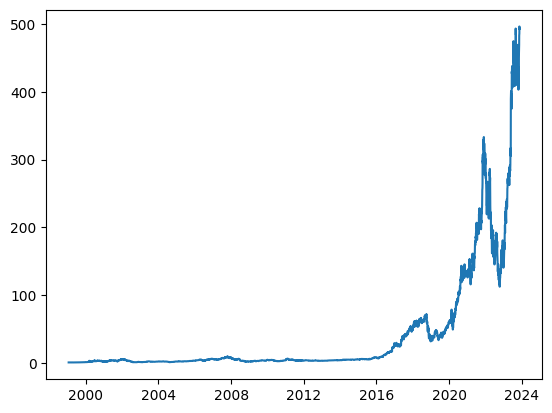

In [39]:
# Plot the information using the new date as index
plt.plot(NVDA.index, NVDA['Adj Close']);

##3. Define the inputs that will be used by the Neural Network

In [40]:
'''
The function below will introduce the inputs to our recurrent neural network algorithm LSTM
'''

# The function will use a window to train the model.
# The inputs will be the dataframe itself with the adjusted price and the dates,
# the first day for the training and the last day, we will be using 3 days to create our predictions

def NVDA_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str) # We also need to change the data type for the dates
  last_date  = str_to_datetime(last_date_str)

# We initialize the first date
  target_date = first_date

# Create empty lists that will contain the dates, the adjusted price (X) and the target (Y)
  dates = []
  X, Y = [], []

  last_time = False
  # The while loop will extract all of the rows including the last n+1 from the tail, but we exclude the target dates
  while True:
    NVDA_subset = dataframe.loc[:target_date].tail(n+1)

# Once we cannot add any more rows to the window, the model will print an error since there will be no more data to complete the window
    if len(NVDA_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

# Now we create a Numpy array that will contain the prices
    values = NVDA_subset['Adj Close'].to_numpy()

# Now we split x and y. X will contain all of the prices excluding the target or our featyres. Y will only contain the target prices
    x, y = values[:-1], values[-1]

# Now we append both x and y to the dates
    dates.append(target_date)
    X.append(x)
    Y.append(y)

# Here we are specifying the model how to select the information from the data frame that will be used for "next week" after the target date
# For this we need to slice the dataframe to include the prices for up to a week ahead
    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]

 # Now we need to extract the dates for the next week

    #First we need to get the last row of the first 2 rows of next week
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-') # we split again the data using separators
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year)) #now we convert the string into integers

    if last_time:
      break

# This updates the target date after the model has processed the current window
    target_date = next_date

# At this point we are telling the model to stop if our target date is the last date in the dataframe
    if target_date == last_date:
      last_time = True

# We create a new data frame and add the column target dates to it
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

# We define X using a Numpy array for preprocessing
  X = np.array(X)

  # We create a for loop that adds the values in X.
  # This loop will iterate over each feature and will add a column to the new dataframe with the name of the target and the day assigned to it
  for i in range(0, n): # n being 3
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = NVDA_to_windowed_df(NVDA,
                                '2022-11-17', #include only the last 5 years of data
                                '2023-11-17',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-11-17,162.85,166.56,159.00,156.67
1,2022-11-18,166.56,159.00,156.67,154.00
2,2022-11-21,159.00,156.67,154.00,153.08
3,2022-11-22,156.67,154.00,153.08,160.28
4,2022-11-23,154.00,153.08,160.28,165.09
...,...,...,...,...,...
247,2023-11-13,465.74,469.50,483.35,486.20
248,2023-11-14,469.50,483.35,486.20,496.56
249,2023-11-15,483.35,486.20,496.56,488.88
250,2023-11-16,486.20,496.56,488.88,494.80


* Target -3 indicates that the model is using the data from 3 days prior the prediction and so on. These will be our inputs for the neural network.

In [41]:
'''
The function below converts the windowed dataframe into a Numpy array
'''

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

# Here we are adding the dates
  dates = df_as_np[:,0]

# Split x and y for preprocessing

# We extract the middle of the array which contain the historical data from the 3,2 and 1 days before the prediction is created
  middle_matrix =  df_as_np[:,1:-1]

# Notice that there are 3 dimensions: Date, 3 features with the historical prices, and the one represents the target for our univariate forecasting or the target price
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

# Here we select the target prices only
  Y = df_as_np[:,-1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

# The shape should explain the dimensions for the input
dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

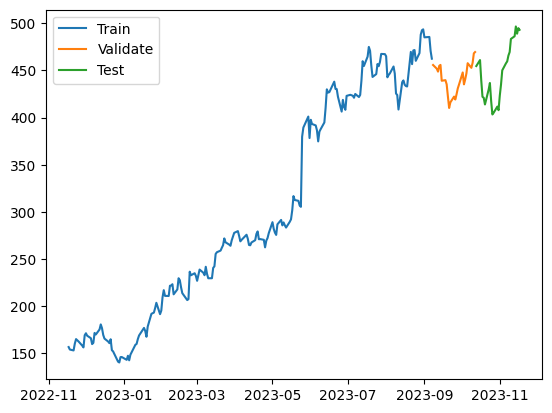

In [42]:
# We have to split dates to test the performance of the model
q_80 = int(len(dates) * 0.8) # 80% test size
q_90 = int(len(dates) * 0.9) # 90% test size

# Now we specify the portion (80%) that will be trained from the dates, X and y
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# The validation set will be from 80-90% of the data
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# We test the model using the last 10% of the data
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Now we plot our results
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test,y_test)
plt.legend(['Train', 'Validate', 'Test'])
plt.show();

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

##Modeling using **LSTM**

In [43]:
# Now we create and train our model with tensorflow
from tensorflow.keras.models import Sequential # This model is ideal for a plain stack of layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# The input 3 by 1 indicates that we are using 3 days in the past and 1 for the univariate forecasting target
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64), # Here we specify that the model that we will be using is LSTM
                    layers.Dense(32, activation =  'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)]) # To predict our one variable


# The mean absolute error tells us on average how far are we from the prediction
model.compile(loss='mse',
            optimizer=Adam(learning_rate=0.001),
            metrics=['mean_absolute_error'])

# Finally we fit the data for training and validation
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 74ms/step - loss: 101836.9062 - mean_absolute_error: 298.8735 - val_loss: 194854.1250 - val_mean_absolute_error: 441.1350
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 101612.0391 - mean_absolute_error: 298.4971 - val_loss: 194564.0625 - val_mean_absolute_error: 440.8062
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 101419.5234 - mean_absolute_error: 298.1783 - val_loss: 194253.5625 - val_mean_absolute_error: 440.4539
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 101208.5156 - mean_absolute_error: 297.8163 - val_loss: 193920.6250 - val_mean_absolute_error: 440.0757
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 100957.3906 - mean_absolute_error: 297.4005 - val_loss: 193523.6875 - val_mean_absolute_error: 439.6245
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 100645.7812 - mean_absolute_error: 296.8619 - val_los

7/7 [==============================] - 0s 2ms/step


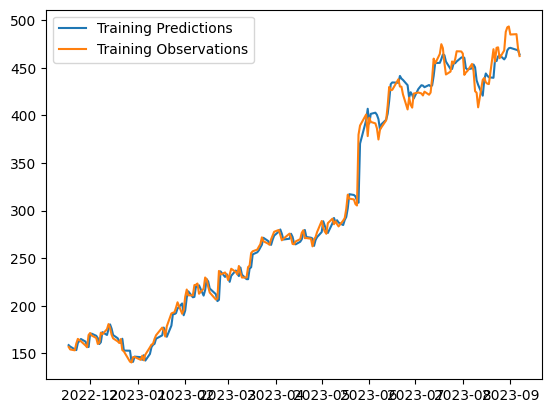

In [44]:
# View the results of the model
train_predictions = model.predict(X_train).flatten() # We have to flatten the data into a 1D array before we can depict it

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show();

###Our model seems to be overfitting the training data

1/1 [==============================] - 0s 22ms/step


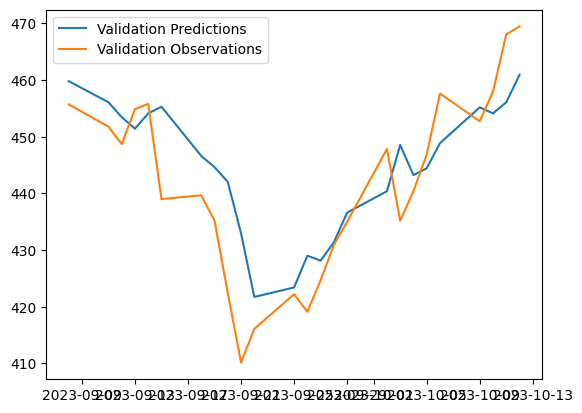

In [45]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show();

#### The model also seems to be overfitting the validation set

1/1 [==============================] - 0s 20ms/step


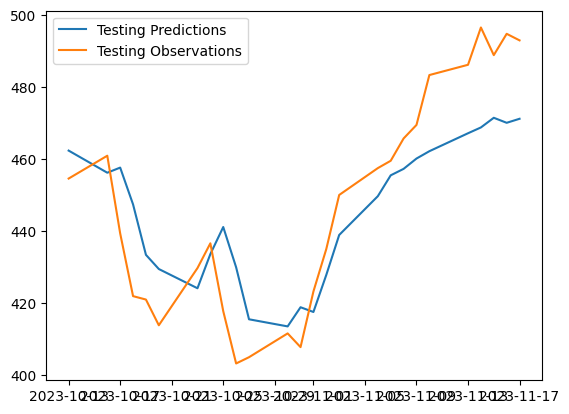

In [46]:
# Now that we have trained and validated the model, we need to test it using the last 10% of the data
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show();

#### As you can see, the blue line, which represents our predictions, was **overfitting** the data. Past a certain date, the model was unable to predict the prices, therefore it cannot predict based on new information.

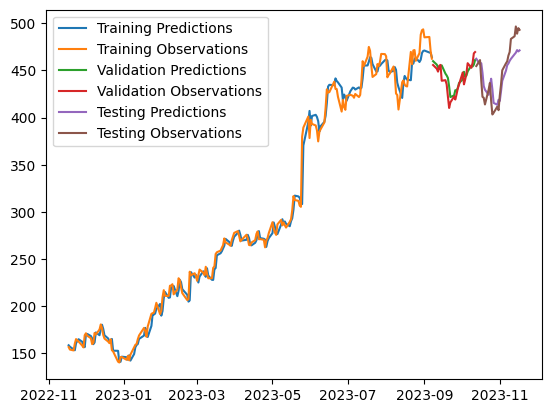

In [47]:
# Plot all of the predictions, validations and testing sets
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations'])
plt.show();

#### Once again, the model is unable to extrapolate past 2023. This means that the model is unable to learn beyond the end date that we defined. This also indicates that the model would not be able to predict stock price if there was exponential growth.

* We will now use a window of 1 year to be able to predict the latest stock prices and the projected growth.

In [48]:
# The only change in this formula will be the windowed dataframe which will have only 1 year worth of data

def NVDA_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False

  while True:
    NVDA_subset = dataframe.loc[:target_date].tail(n+1)

    if len(NVDA_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = NVDA_subset['Adj Close'].to_numpy()

    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]

    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)

  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = NVDA_to_windowed_df(NVDA,
                                '2022-11-17', # Include only the last year of data
                                '2023-11-17',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-11-17,162.85,166.56,159.00,156.67
1,2022-11-18,166.56,159.00,156.67,154.00
2,2022-11-21,159.00,156.67,154.00,153.08
3,2022-11-22,156.67,154.00,153.08,160.28
4,2022-11-23,154.00,153.08,160.28,165.09
...,...,...,...,...,...
247,2023-11-13,465.74,469.50,483.35,486.20
248,2023-11-14,469.50,483.35,486.20,496.56
249,2023-11-15,483.35,486.20,496.56,488.88
250,2023-11-16,486.20,496.56,488.88,494.80


#### **Now we will use the same functions from above**

In [49]:
'''
The function below converts the windowed dataframe into a Numpy array
'''

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:,0]

  middle_matrix =  df_as_np[:,1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:,-1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

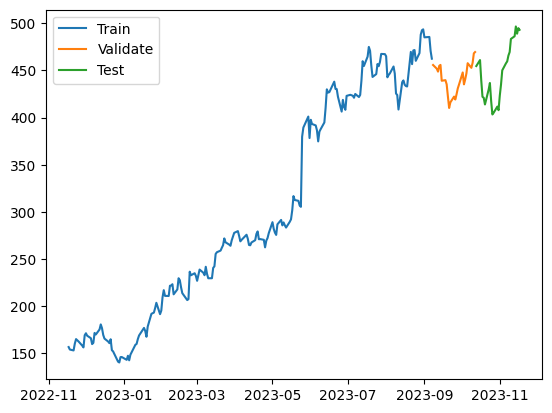

In [50]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test,y_test)
plt.legend(['Train', 'Validate', 'Test'])
plt.show();

##Re-model using new dates

In [51]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation =  'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
            optimizer=Adam(learning_rate=0.001),
            metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 67ms/step - loss: 102006.3203 - mean_absolute_error: 299.1583 - val_loss: 195138.2969 - val_mean_absolute_error: 441.4571
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 101833.1406 - mean_absolute_error: 298.8715 - val_loss: 194946.7188 - val_mean_absolute_error: 441.2400
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 101710.9219 - mean_absolute_error: 298.6639 - val_loss: 194787.9219 - val_mean_absolute_error: 441.0600
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 101604.4062 - mean_absolute_error: 298.4781 - val_loss: 194634.5156 - val_mean_absolute_error: 440.8860
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 101481.4688 - mean_absolute_error: 298.2637 - val_loss: 194412.6562 - val_mean_absolute_error: 440.6344
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 101271.6484 - mean_absolute_error: 297.9112 - val_lo

We can train the model to predict the future values without needing the 3 previous days as we did above in our short term model



7/7 [==============================] - 0s 2ms/step


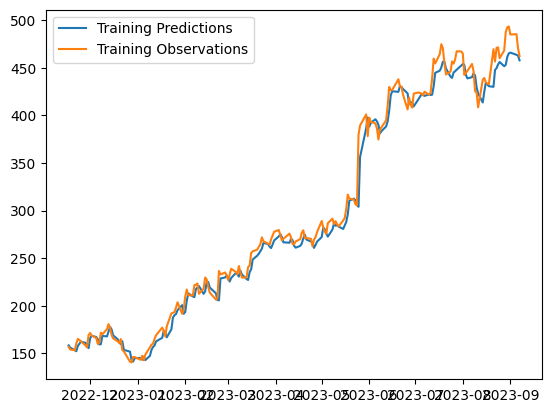

In [52]:
# View the results of the new model
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show();

1/1 [==============================] - 0s 16ms/step


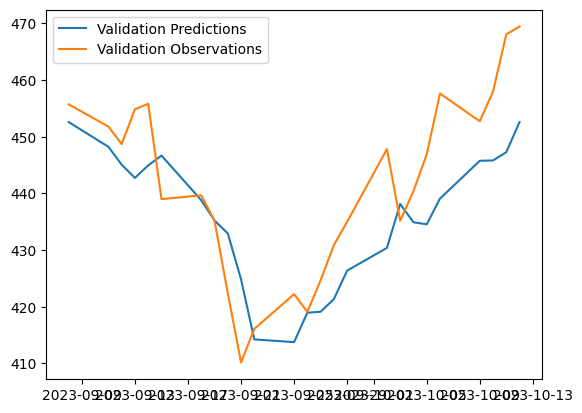

In [53]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show();

1/1 [==============================] - 0s 14ms/step


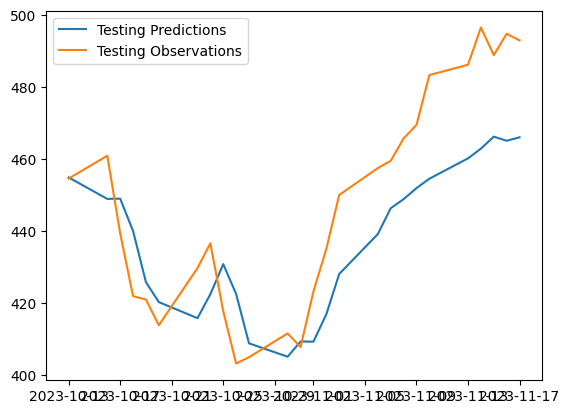

In [54]:
# Check the test results
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show();

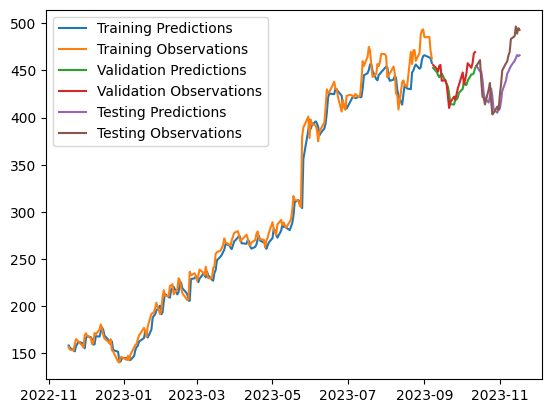

In [55]:
# Plot all the lines in the same graph
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations'])
plt.show();

Now we can see how our model is capable of predict using the test size.

Now let's try to implement this model for a long-term investment strategy

In [56]:
# This is how we use the same model for a long-term prediction
from copy import deepcopy

# The idea is for the model to recur to our algorithm using LSTM
# This allows for the model to teach itself and apply this to a long-term investment strategy
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 15ms/step


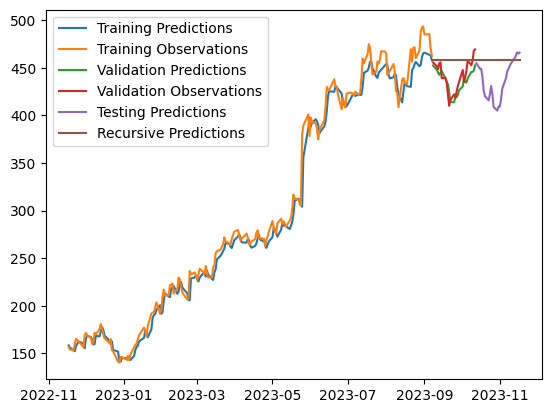

In [57]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Recursive Predictions'])
plt.show();

##**Conclusion:**

The flat trajectory of the brown line (representing recursive predictions) strongly suggests that this model is not well suited for long-term investment strategies. Instead, it appears better suited for day trading scenarios. The model's reliance on information from only the previous three days might hinder its ability to capture evolving market dynamics effectively. While long-term memory does hold valuable information, short-term or real-time data often plays a more significant role in shaping market prices and guiding momentum. For a model intended for long-term investment strategies, a more comprehensive dataset would be essential to capture broader market trends. In this context, a supervised machine learning approach like the random forest regressor holds would be ideal. By iteratively processing the entire dataset and generating individual predictions known as leaves, this method can provide a more comprehensive view of market behavior, potentially leading to more accurate long-term investment decisions.



##References:

https://www.mathworks.com/help/deeplearning/ug/long-short-term-memory-networks.html

https://cs230.stanford.edu/projects_winter_2020/reports/32066186.pdf

https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/

https://www.youtube.com/watch?v=CbTU92pbDKw

https://www.youtube.com/watch?v=5dMXyiWddYs